In [2]:
# Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas_profiling
import requests # might need to be installed
%matplotlib inline

In [3]:
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')

In [10]:
# getting a data dictionary
response = requests.get('https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/205873/data_description.txt?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1564407075&Signature=Iduf4UDvx2Cei5S9B7A%2B%2Fz3u%2Ff8GG0RxvpfMu5IHRtJOFBsjq806B2sSr6zucZBwJeBNSOuIpOssfa4i%2BYS8ybrJgaHnA%2Fqkcox6ZsD8BLIl3yTHjwmfkie2ohGSI0bdZLiXblBWps8xJ8sGZPnmTegLYLhFgrA7O0BEF5dIXrFVYufTcndkOeOyYm3fopGjTablaxWOUyhmd43WfOxADJInaMqUk37SBzVD4jD1bj%2F%2B%2FJkK7OeTvUIBJOR3EXij97rhVqcZNdxTttF91t0W3HFcqJrRhrw5%2BKvZmHNzsT5AO164QSjlFqT5kU3dZWoZqxdDOxImVvr%2Fw2m4IRZGCw%3D%3D')
dict = response.text


In [ ]:
print(dict)

In [ ]:
train.describe().T
test.describe().T

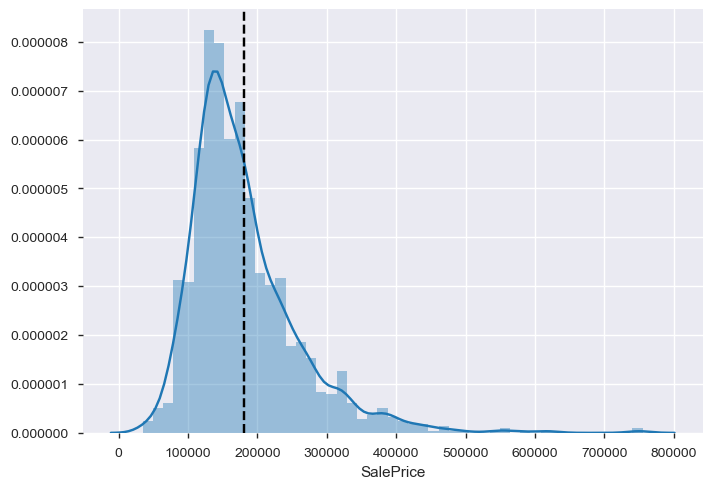

In [25]:
sns.distplot(train['SalePrice'])
plt.axvline(train['SalePrice'].mean(), color="k", linestyle="--")

In [ ]:
# sns.pairplot(train, hue='SalePrice') # not a good idea

In [16]:
pandas_profiling.ProfileReport(train)

Number of variables,81
Number of observations,1460
Total Missing (%),5.9%
Total size in memory,924.0 KiB
Average record size in memory,648.1 B
Numeric,38
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Dealing with missing values in obvious features

In [50]:
# Type of alley access to property
# print(train['Alley']).column_name()
# for c in train.columns:
#     print(train[c].value_counts())
#     print("Number of NaNs in the column {} is {}".format(c, train[c].isna().sum()))

train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
train['Alley'].fillna('NA', inplace = True)
train['FireplaceQu'].fillna('NA', inplace = True)
train['GarageQual'].fillna('NA', inplace = True)
train['GarageFinish'].fillna('NA', inplace = True)
train['GarageCond'].fillna('NA', inplace = True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
train['GarageType'].fillna('NA', inplace = True)
train['PoolQC'].fillna('NA', inplace = True)
train['Fence'].fillna('NA', inplace = True)
train['MiscFeature'].fillna('NA', inplace = True)
train['MasVnrType'].fillna('None', inplace = True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace = True)
train['BsmtQual'].fillna('NA', inplace = True)
train['BsmtCond'].fillna('NA', inplace = True)
train['BsmtExposure'].fillna('NA', inplace = True)
train['BsmtFinType1'].fillna('NA', inplace = True)
train['BsmtFinType2'].fillna('NA', inplace = True)
train['Electrical'].fillna('SBrkr', inplace = True) # substituting with the majority class

# and for the test set

test['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
test['Alley'].fillna('NA', inplace = True)
test['FireplaceQu'].fillna('NA', inplace = True)
test['GarageQual'].fillna('NA', inplace = True)
test['GarageFinish'].fillna('NA', inplace = True)
test['GarageCond'].fillna('NA', inplace = True)
test['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
test['GarageType'].fillna('NA', inplace = True)
test['PoolQC'].fillna('NA', inplace = True)
test['Fence'].fillna('NA', inplace = True)
test['MiscFeature'].fillna('NA', inplace = True)
test['MasVnrType'].fillna('None', inplace = True)
test['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace = True)
test['BsmtQual'].fillna('NA', inplace = True)
test['BsmtCond'].fillna('NA', inplace = True)
test['BsmtExposure'].fillna('NA', inplace = True)
test['BsmtFinType1'].fillna('NA', inplace = True)
test['BsmtFinType2'].fillna('NA', inplace = True)
test['Electrical'].fillna('SBrkr', inplace = True) # substituting with the majority class

In [ ]:
# Let's look a column name, and a number of NaNs
train.isna().sum()
#or 
train.columns[train.isna().any()].tolist()

### Feature engineering part

In [ ]:
# Need to check cardinality in train and test sets and look at the outlies in columns to which it applies

In [ ]:
for col in train.columns:
    if train[col].dtype == "object":
        print("Cardinality of %s variable in Train Data:"%col,train[col].nunique())
        print("Cardinality of %s variable in Test Data:"%col,test[col].nunique())
        print("\n")

In [73]:
for col in train.columns:
    if train[col].dtype == "object":
        print("For column {} cardinality in Train minus cardinality in Test equals: {}".format(col,train[col].nunique()-test[col].nunique()))

For column MSZoning cardinality in Train minus cardinality in Test equals: 0
For column Street cardinality in Train minus cardinality in Test equals: 0
For column Alley cardinality in Train minus cardinality in Test equals: 0
For column LotShape cardinality in Train minus cardinality in Test equals: 0
For column LandContour cardinality in Train minus cardinality in Test equals: 0
For column Utilities cardinality in Train minus cardinality in Test equals: 1
For column LotConfig cardinality in Train minus cardinality in Test equals: 0
For column LandSlope cardinality in Train minus cardinality in Test equals: 0
For column Neighborhood cardinality in Train minus cardinality in Test equals: 0
For column Condition1 cardinality in Train minus cardinality in Test equals: 0
For column Condition2 cardinality in Train minus cardinality in Test equals: 3
For column BldgType cardinality in Train minus cardinality in Test equals: 0
For column HouseStyle cardinality in Train minus cardinality in Tes

#### Exploring columns where != 0:

In [ ]:
# combining into one dataset in order to more conveniently compare unique values in these columns:
train_1 = train.copy()
train_1.drop(labels = 'SalePrice', axis = 1, inplace = True)
train_1['Status'] = 'Train Set'
test_1 = test.copy()
test_1['Status'] = 'Test Set'
combo = train_1.copy()
combo = combo.append(test_1)

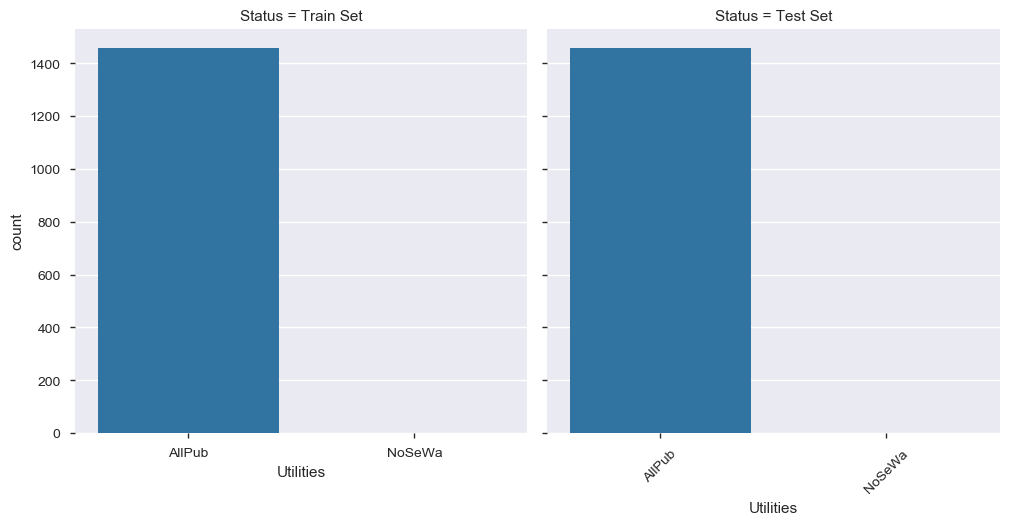

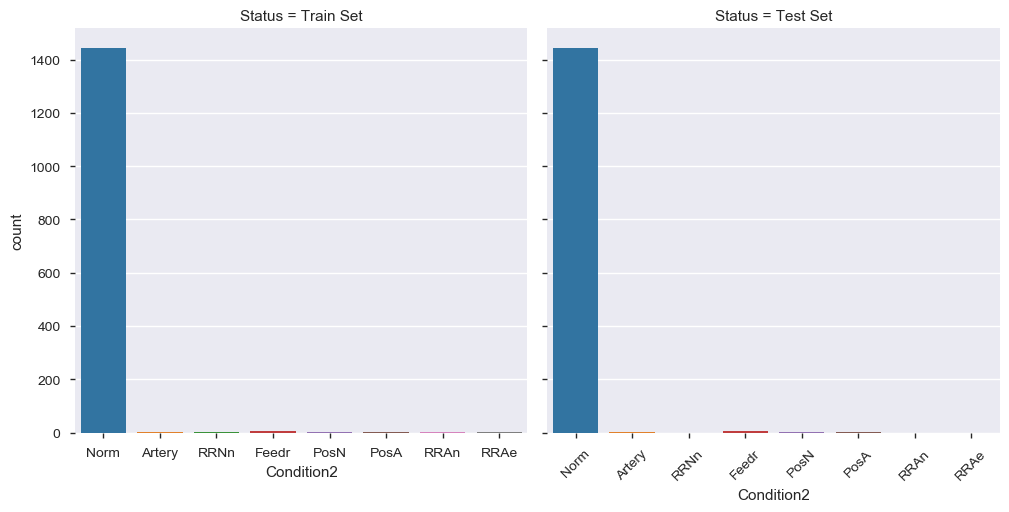

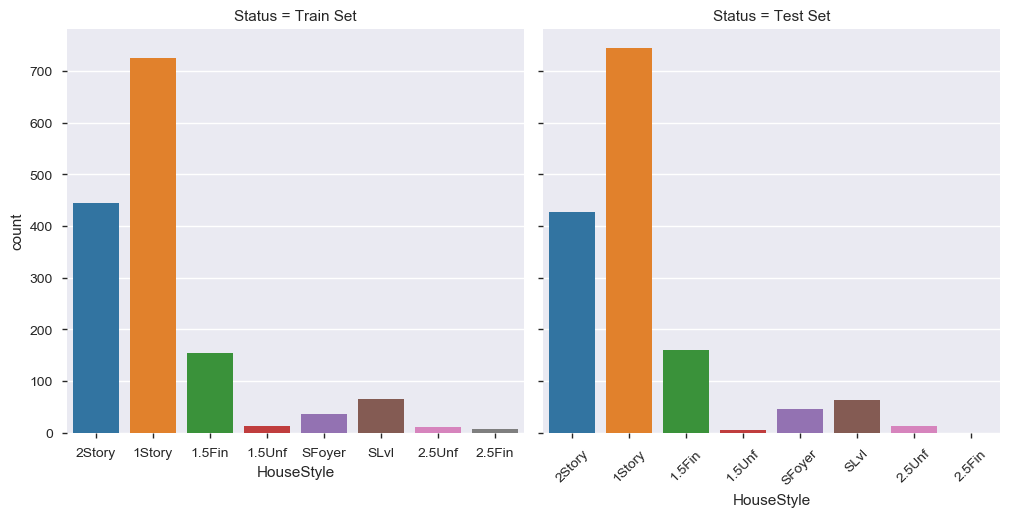

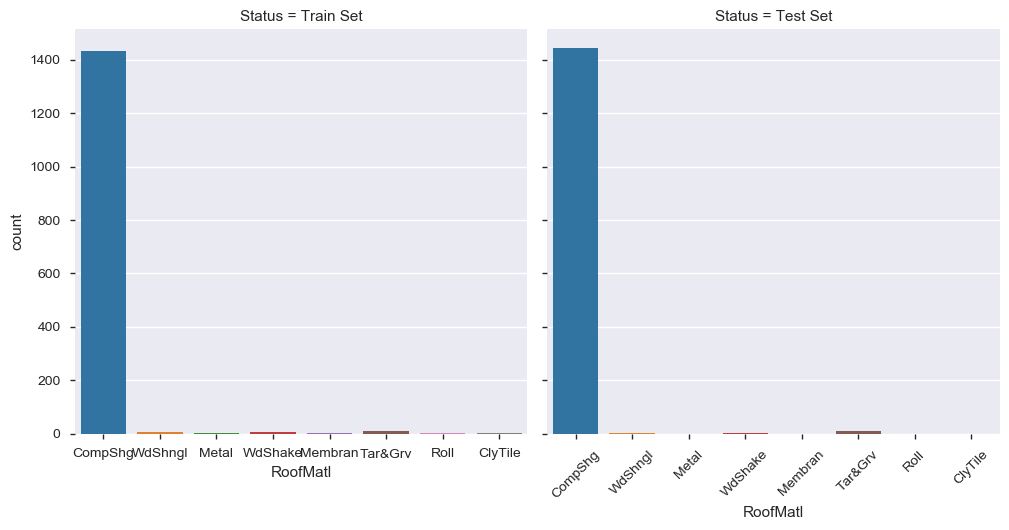

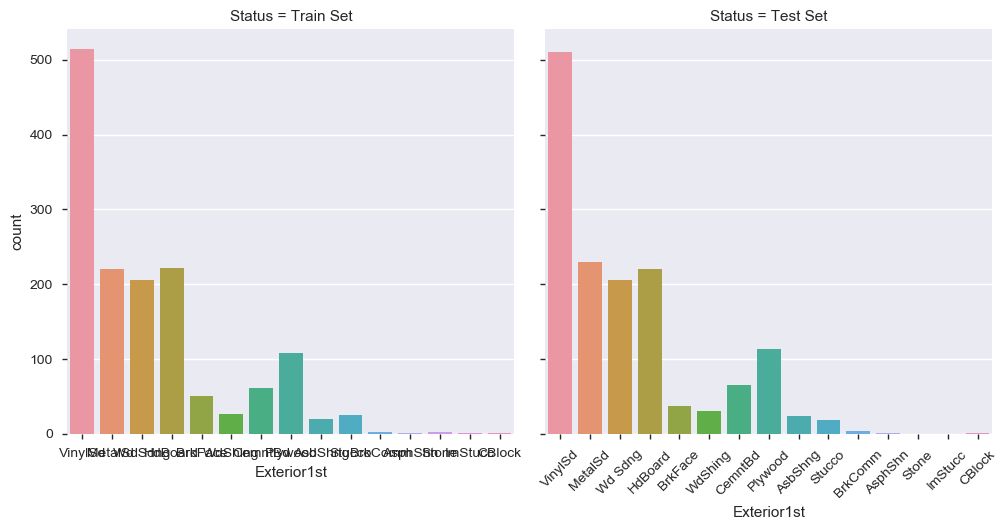

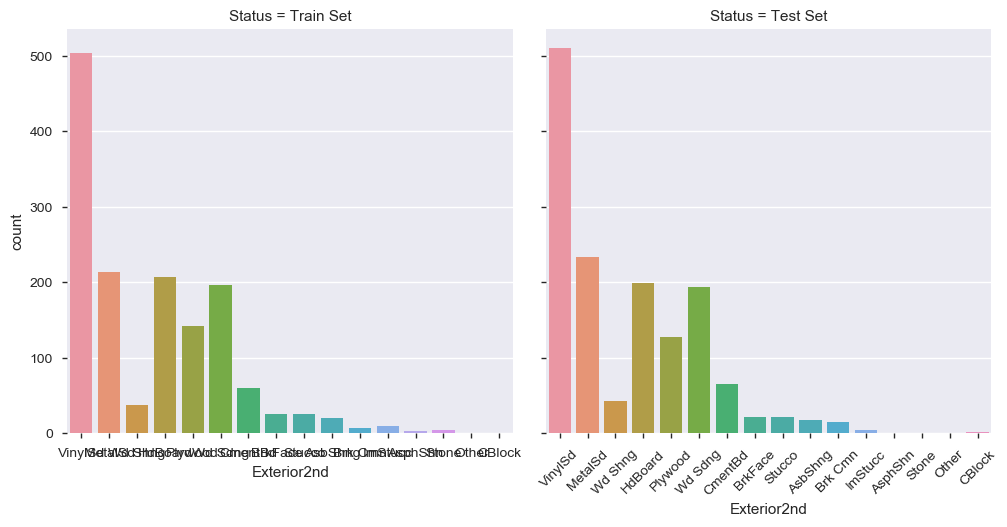

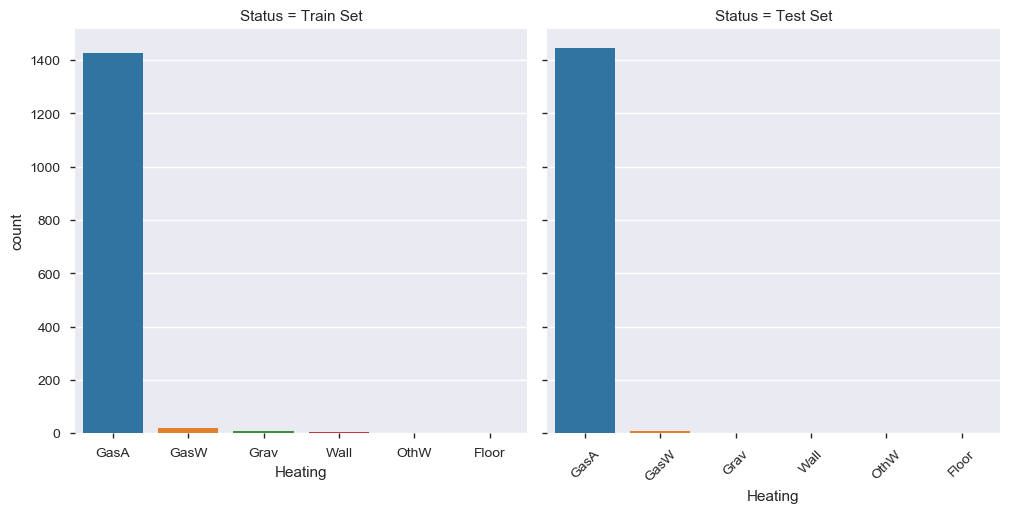

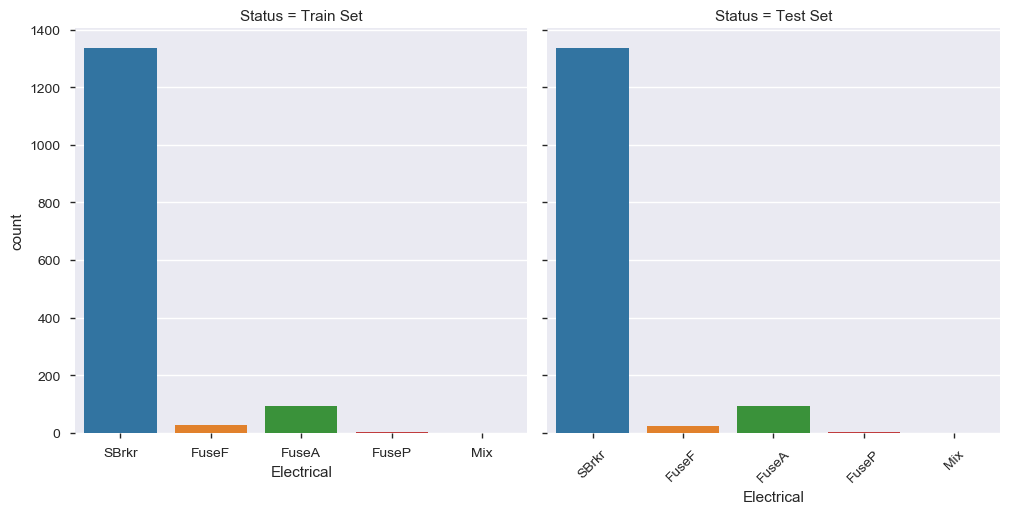

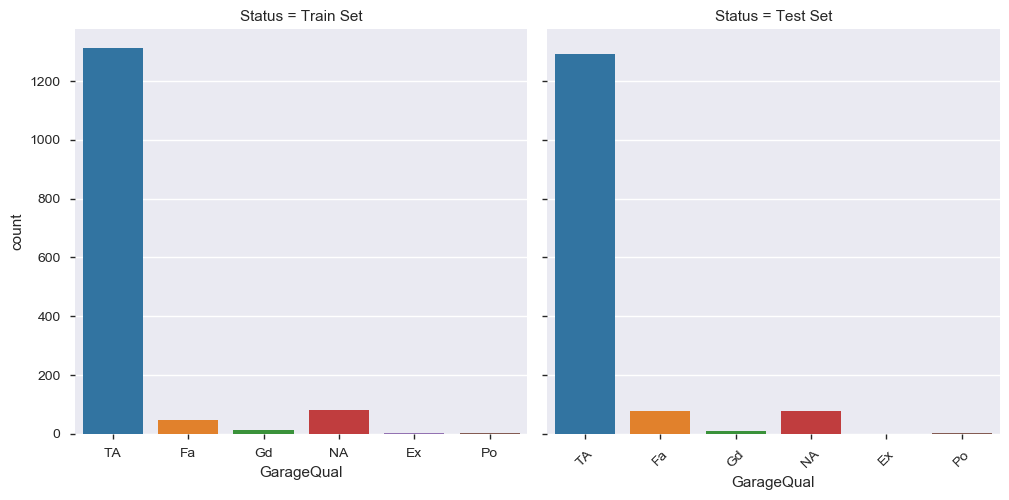

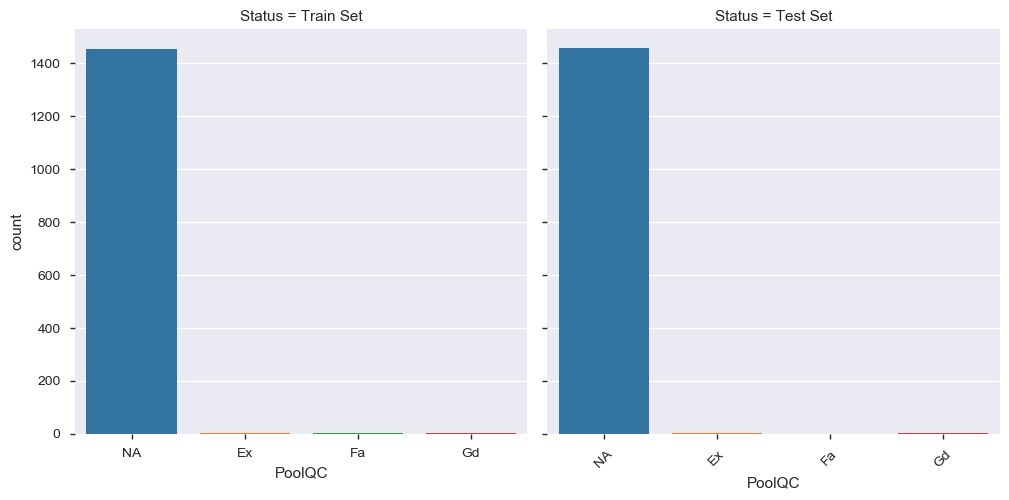

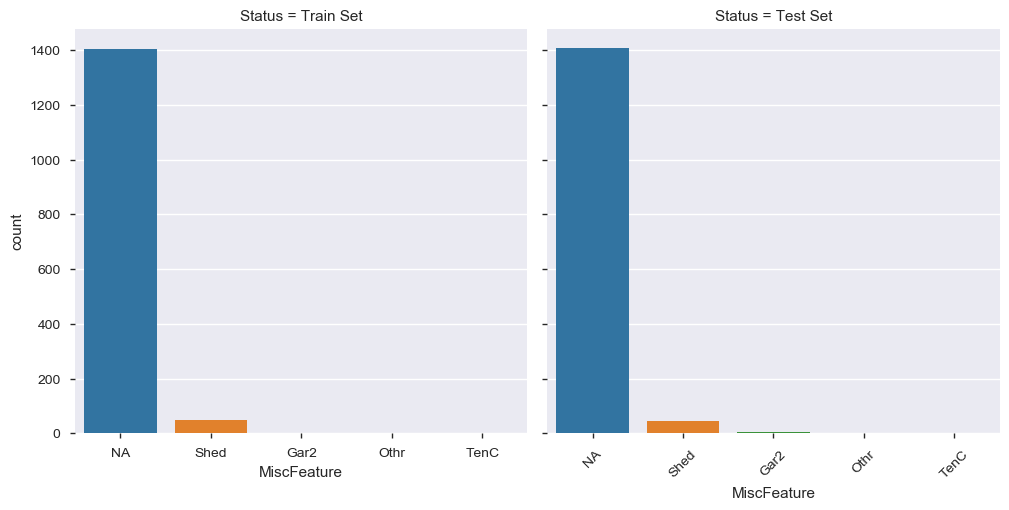

In [113]:
# looking at unique values
cols_list = ['Utilities','Condition2','HouseStyle','RoofMatl','Exterior1st','Exterior2nd',
            'Heating','Electrical','GarageQual','PoolQC','MiscFeature']
for l in cols_list:
    sns.catplot(x=l, col='Status', kind='count', data=combo)
    plt.xticks(rotation=45)

# sns.catplot(x='Utilities', col='Status', kind='count', data=combo);